In [73]:
# packages
import pandas as pd
import numpy as np
import math

from claspy.segmentation import BinaryClaSPSegmentation

import ruptures as rpt

import stumpy
from aeon.segmentation import find_dominant_window_sizes

from aeon.segmentation import GreedyGaussianSegmenter

from aeon.segmentation import InformationGainSegmenter

from aeon.anomaly_detection import STRAY

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer,mean_squared_error
from ruptures.metrics import precision_recall
import matplotlib.pyplot as plt
#from aeon.visualisation import plot_series_with_change_points, plot_series_with_profiles
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

from claspy.tests.evaluation import f_measure,covering

from claspy.window_size import dominant_fourier_frequency, highest_autocorrelation, suss

Extracted features. Use the index of this list to use with iloc[]
<ol start="0">
  <li>Kinetic Global</li>
  <li>Kinetic Chest</li>
  <li>Directness Head</li>
  <li>Density</li>
  <li>left wrist ke</li>
  <li>right wrist ke</li>
  <li>left ankle ke</li>
  <li>right ankle ke</li>
  <li>head ke</li>
  <li>crouch density</li>
  <li>left leg density</li>
  <li>right leg density</li>
  <li>left hand density</li>
  <li>right hand density</li>
  <li>head density</li>
  <li>arto inferiore</li>
  <li>gamba</li>
  <li>coscia</li>
  <li>coscia dx</li>
  <li>coscia sx</li>
  <li>gamba sx</li>
  <li>gamba dx</li>
  <li>braccio sx</li>
  <li>braccio dx</li>
  <li>avambraccio sx</li>
  <li>avambraccio dx</li>
  <li>ARIEL speed magnitude</li>
  <li>ARIEL speed X component</li>
  <li>ARIEL speed Y component</li>
  <li>ARIEL speed Z component</li>
  <li>ARIEL acceleration magnitude</li>
  <li>ARIEL acceleration X component</li>
  <li>ARIEL acceleration Y component</li>
  <li>ARIEL acceleration Z component</li>
  <li>ARIEL jerk magnitude</li>
  <li>ARIEL jerk X component</li>
  <li>ARIEL jerk Y component</li>
  <li>ARIEL jerk Z component</li>
  <li>STRN speed magnitude</li>
  <li>STRN speed X component</li>
  <li>STRN speed Y component</li>
  <li>STRN speed Z component</li>
  <li>STRN acceleration magnitude</li>
  <li>STRN acceleration X component</li>
  <li>STRN acceleration Y component</li>
  <li>STRN accelerationZ component</li>
  <li>STRN jerk magnitude</li>
  <li>STRN jerk X component</li>
  <li>STRN jerk Y component</li>
  <li>STRN jerk Z component</li>
  <li>RHEL speed magnitude</li>
  <li>RHEL speed X component</li>
  <li>RHEL speed Y component</li>
  <li>RHEL speed Z component</li>
  <li>RHEL acceleration magnitude</li>
  <li>RHEL acceleration X component</li>
  <li>RHEL acceleration Y component</li>
  <li>RHEL acceleration Z component</li>
  <li>RHEL jerk magnitude</li>
  <li>RHEL jerk X component</li>
  <li>RHEL jerk Y component</li>
  <li>RHEL jerk Z component</li>
  <li>LHEL speed magnitude</li>
  <li>LHEL speed X component</li>
  <li>LHEL speed Y component</li>
  <li>LHEL speed Z component</li>
  <li>LHEL acceleration magnitude</li>
  <li>LHEL acceleration X component</li>
  <li>LHEL acceleration Y component</li>
  <li>LHEL acceleration Z component</li>
  <li>LHEL jerk magnitude</li>
  <li>LHEL jerk X component</li>
  <li>LHEL jerk Y component</li>
  <li>LHEL jerk Z component</li>
  <li>RPLM speed magnitude</li>
  <li>RPLM speed X component</li>
  <li>RPLM speed Y component</li>
  <li>RPLM speed Z component</li>
  <li>RPLM acceleration magnitude</li>
  <li>RPLM acceleration X component</li>
  <li>RPLM acceleration Y component</li>
  <li>RPLM acceleration Z component</li>
  <li>RPLM jerk magnitude</li>
  <li>RPLM jerk X component</li>
  <li>RPLM jerk Y component</li>
  <li>RPLM jerk Z component</li>
  <li>LPLM speed magnitude</li>
  <li>LPLM speed X component</li>
  <li>LPLM speed Y component</li>
  <li>LPLM speed Z component</li>
  <li>LPLM acceleration magnitude</li>
  <li>LPLM acceleration X component</li>
  <li>LPLM acceleration Y component</li>
  <li>LPLM acceleration Z component</li>
  <li>LPLM jerk magnitude</li>
  <li>LPLM jerk X component</li>
  <li>LPLM jerk Y component</li>
  <li>LPLM jerk Z component</li>




</ol>

In [74]:
# list of features. To access its name or its value while using iloc
features_name=[
    "kinetic_global",
    "kinetic_chest",
    "directness_head",
    "density",
    "left_wrist_ke",
    "right_wrist_ke",
    "left_ankle_ke",
    "right_ankle_ke",
    "head_ke",
    "crouch_density",
    "left_leg_density",
    "right_leg_density",
    "left_hand_density",
    "right_hand_density",
    "head_density",
    "arto_inferiore",
    "gamba",
    "coscia",
    "coscia_dx",
    "coscia_sx",
    "gamba_sx",
    "gamba_dx",
    "braccio_sx",
    "braccio_dx",
    "avambraccio_sx",
    "avambraccio_dx",
    "ARIEL_speed_magnitude",
    "ARIEL_speed_X_component",
    "ARIEL_speed_Y_component",
    "ARIEL_speed_Z_component",
    "ARIEL_acceleration_magnitude",
    "ARIEL_acceleration_X_component",
    "ARIEL_acceleration_Y_component",
    "ARIEL_acceleration_Z_component",
    "ARIEL_jerk_magnitude",
    "ARIEL_jerk_X_component",
    "ARIEL_jerk_Y_component",
    "ARIEL_jerk_Z_component",
    "STRN_speed_magnitude",
    "STRN_speed_X_component",
    "STRN_speed_Y_component",
    "STRN_speed_Z_component",
    "STRN_acceleration_magnitude",
    "STRN_acceleration_X_component",
    "STRN_acceleration_Y_component",
    "STRN_acceleration_Z_component",
    "STRN_jerk_magnitude",
    "STRN_jerk_X_component",
    "STRN_jerk_Y_component",
    "STRN_jerk_Z_component",
    "RHEL_speed_magnitude",
    "RHEL_speed_X_component",
    "RHEL_speed_Y_component",
    "RHEL_speed_Z_component",
    "RHEL_acceleration_magnitude",
    "RHEL_acceleration_X_component",
    "RHEL_acceleration_Y_component",
    "RHEL_acceleration_Z_component",
    "RHEL_jerk_magnitude",
    "RHEL_jerk_X_component",
    "RHEL_jerk_Y_component",
    "RHEL_jerk_Z_component",
    "LHEL_speed_magnitude",
    "LHEL_speed_X_component",
    "LHEL_speed_Y_component",
    "LHEL_speed_Z_component",
    "LHEL_acceleration_magnitude",
    "LHEL_acceleration_X_component",
    "LHEL_acceleration_Y_component",
    "LHEL_acceleration_Z_component",
    "LHEL_jerk_magnitude",
    "LHEL_jerk_X_component",
    "LHEL_jerk_Y_component",
    "LHEL_jerk_Z_component",
    "RPLM_speed_magnitude",
    "RPLM_speed_X_component",
    "RPLM_speed_Y_component",
    "RPLM_speed_Z_component",
    "RPLM_acceleration_magnitude",
    "RPLM_acceleration_X_component",
    "RPLM_acceleration_Y_component",
    "RPLM_acceleration_Z_component",
    "RPLM_jerk_magnitude",
    "RPLM_jerk_X_component",
    "RPLM_jerk_Y_component",
    "RPLM_jerk_Z_component",
    "LPLM_speed_magnitude",
    "LPLM_speed_X_component",
    "LPLM_speed_Y_component",
    "LPLM_speed_Z_component",
    "LPLM_acceleration_magnitude",
    "LPLM_acceleration_X_component",
    "LPLM_acceleration_Y_component",
    "LPLM_acceleration_Z_component",
    "LPLM_jerk_magnitude",
    "LPLM_jerk_X_component",
    "LPLM_jerk_Y_component",
    "LPLM_jerk_Z_component",
]

In [75]:
def f1scoremargin(ground_truth, predictions, tolerance):
    """
    Calcola l'F1 score con una finestra di tolleranza sui change points.
    
    :param ground_truth: Lista o array di change points reali
    :param predictions: Lista o array di change points predetti
    :param tolerance: La tolleranza temporale (numero di unità temporali)
    :return: precision, recall, f1-score
    """
    ground_truth = np.array(ground_truth)
    predictions = np.array(predictions)
    
    # Vettori per tracciare quali punti sono stati già associati
    matched_ground_truth = np.zeros(len(ground_truth), dtype=bool)
    matched_predictions = np.zeros(len(predictions), dtype=bool)

    mgt={key: False for key in ground_truth}
    mcp={key: False for key in predictions}
    #print(f'gt:{len(ground_truth)} - cp:{len(predictions)}')
    # True Positives (TP)
    tp = 0
    for i, gt_point in enumerate(ground_truth):
        for j, pred_point in enumerate(predictions):
            
            if not matched_predictions[j] and abs(gt_point - pred_point) <= tolerance:
                tp += 1
                matched_ground_truth[i] = True
                matched_predictions[j] = True

                mgt[gt_point] = True
                mcp[pred_point] = True
                break
            
    
    # False Positives (FP) - predizioni non corrispondenti a nessun ground truth entro la tolleranza
    fp = np.sum(~matched_predictions)
    
    # False Negatives (FN) - punti del ground truth non corrispondenti a nessuna predizione entro la tolleranza
    fn = np.sum(~matched_ground_truth)
    #print(f'tp:{tp} - fp:{fp} - fn:{fn}')
    #print(mgt)
    #print(mcp)
    # Calcolo di precision, recall e F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f'gt:{len(ground_truth)} cp:{len(predictions)} tp:{tp} fp:{fp} fn:{fn}')
    return precision, recall, f1, {"tp":tp, "fp":fp, "fn":fn}

In [76]:
def ReadAndPreProcess(inputDataRaw):
    # lettura
    df=pd.read_csv(inputDataRaw,sep=' ', header=None).interpolate()
    
    df=df.drop(0, axis=1)
    df=df.drop_duplicates()
    df = df.iloc[:, ::-1]
 

    return df

In [77]:
# questa funzione ritorna un dataframe del groundtruth che viene usato specificatamente per visualizzare il gt
# è soggetto a un preprocessing dei dati siccome l'ultimo groundtruth è dove termina il ts del gt
# di conseguenza per farlo corrispondere, bisogna stretcharlo
# ma ricordo di aver rifatti i dati nuovi per generare un groundtruth a fine ts, da controllare cosi che non serve stretcharlo?
def LoadingGroundTruth(df,gtraw):
    gt=pd.read_csv(gtraw,sep=' ', header=None)
    gt=gt.iloc[:,0].values
    #stretching dei dati se necessario per farlo corrispondere alla ts dei dati
    stretch_gt = np.array([])
    for idx,i in enumerate(gt):
        relpos = len(df)*i/gt[-1]
        stretch_gt = np.append(stretch_gt,relpos)

    # eliminiamo l'ultimo elemento che è stato annotato solo per delimitare la lunghezza della gt simile alla ts
    
    return stretch_gt[:-1]

In [78]:
def GetClasp2(df,gt,known,feature, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in feature:
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1

        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp

In [79]:
# utilizzo CLASP 
# prende come parametro un dataframe e restituisce il clasp score
# gt e known vengono usati per usare il numero vero di cp se uguale a 1 sennò si cerca di predirlo se il modello lo permette
def GetClasp3(df,gt,known,feature, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in [feature]:
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1

        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp

In [80]:
# utilizzo CLASP 
# prende come parametro un dataframe e restituisce il clasp score
# gt e known vengono usati per usare il numero vero di cp se uguale a 1 sennò si cerca di predirlo se il modello lo permette
def GetClasp(df,gt,known, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in range(0,len(features_name)):
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1

        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp
        
    


In [81]:
def PlotResult(df,gt,cp, nomeFile, margin,clasplist):
    #da testare quando ho piu valori
    #clasp.plot(gt_cps=gt.astype(int), heading="Segmentation of different umpire cricket signals", ts_name="ACC", file_path="segmentation_example.png")

    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(df.iloc[:,3].values)),df.iloc[:,3].values,'blue',linewidth=0.5)

    for i in gt.astype(int):
     
        plt.axvline(x = i, color = 'green',linewidth=1) 
            
    for j in cp.tolist():
        plt.axvline(x = j, color = 'red',linewidth=1,linestyle="-.") 

    for k in gt.astype(int):
        plt.fill_betweenx(np.array([0, 1]), k-margin, k+margin, color='green', alpha=0.3)
    plt.xlabel(f'{nomeFile} {f1scoremargin(gt.astype(int),cp.astype(int),margin)}')

    #plt.figure(figsize=(18,9))

 



In [82]:
def Plotclasp(eachclasp,gt,margin,eachcp,feature_list):
    #print("idx"+str(asd))
    
    for idx,clasp in enumerate(eachclasp):
        print(features_name[feature_list[idx]])
        clasp.plot(gt_cps=gt.astype(int), heading=f'f1margin: {f1scoremargin(gt.astype(int),eachcp[idx].astype(int),margin)}')
        #clasp.plot(gt_cps=None, heading=f'f1margin: {f1scoremargin(gt.astype(int),eachcp[idx].astype(int),margin)}', ts_name="suss")


        plt.xlabel(features_name[feature_list[idx]])
        for idx2,j in enumerate(gt.astype(int)):
            plt.fill_betweenx(np.array([0, 1]), j-margin, j+margin, color='green', alpha=0.3)

        


In [83]:
# calcola i vari scores dati il groundtruth e il prediction
# puo salvare il risultato su file per evitare di perderli
# prende come parametro nome del groundtruth, groundtruth, nome della timeseries e il prediction
def Evaluate(modelName,gtName, gt, tsName, cp, df, margin):
    # creo dei array di lunghezza come la ts cosi possono fare il confronto
    # sia per il gt che per il pd
  
    cpnump = np.array(cp)
    gtnump = np.array(gt)

    cp_long = np.zeros(len(df)+1)
    cp_long[cpnump.astype(int)]=1

    gt_long = np.zeros(len(df)+1)
    gt_long[gtnump.astype(int)]=1

    # calcolo lo score 
    print(f'f1margin: {f1scoremargin(gt.astype(int),cp.astype(int),margin)}')
    return f1scoremargin(gt.astype(int),cp.astype(int),margin)
    

In [84]:
def IgnoreZone(idx,cpraw):
    cp = cpraw.tolist()
    if idx == 0:
        for i in range(len(cp)-1, -1, -1):
            if cp[i] > 3944.7118557910376+100 and cp[i] < 5911.693516853054-100 or cp[i] > 12845.0+100:
                cp.pop(i)
                
        
    elif idx == 1:
        for i in range(len(cp)-1, -1, -1):
            if cp[i]< 969.6180827886711-100 and cp[i] > 13125.469063180826+100:
                cp.pop(i)
    elif idx == 2:
        for i in range(len(cp)-1, -1, -1):
            if cp[i] > 2874.607407407407+100 and cp[i] < 4016.935849056604-100:
                cp.pop(i)

    elif idx == 17:
        for i in range(len(cp)-1, -1, -1):
            if cp[i] > 180.03455207940698+100 and cp[i] < 1227.051137077522-100 or cp[i] > 5865.505591154668+100:
                cp.pop(i)

    elif idx == 18:
        for i in range(len(cp)-1, -1, -1):
            if cp[i] > 138.33224102186853+100 and cp[i] < 3677.231833076974-100:
                cp.pop(i)


    elif idx == 20:
        for i in range(len(cp)-1, -1, -1):
            if cp[i] > 8187.634803581529+100:
                cp.pop(i)


    else:
        pass
        #print("error IgnoreZone()")
    return np.array(cp)

In [85]:
def delnear(arr,range):
    i = 0
    while i < len(arr) - 1:
        # Iniziamo con il primo elemento di un potenziale gruppo
        gruppo_inizio = i
        gruppo_fine = i

        # Cerca gli elementi che fanno parte dello stesso gruppo
        while gruppo_fine < len(arr) - 1 and arr[gruppo_fine + 1] - arr[gruppo_fine] < range:
            gruppo_fine += 1

        # Se esiste un gruppo di più elementi
        if gruppo_fine > gruppo_inizio:
            # Se la distanza tra l'inizio e la fine è minore di 50, elimina l'elemento maggiore (gruppo_fine)
            if arr[gruppo_fine] - arr[gruppo_inizio] < range:
                arr = np.delete(arr, gruppo_fine)
            
            # Elimina tutti gli elementi interni al gruppo
            arr = np.concatenate((arr[:gruppo_inizio + 1], arr[gruppo_fine:]))

        # Procedi con il prossimo gruppo
        i = gruppo_inizio + 1

    return arr

In [86]:
def MajorityVoteCP(arr,margin,amount):
    
    # se vicino continua ad aggiungere

    # se lontano e bucket presente, generare medio

    # se lontano e bucket vuoto aggiornare start
    bucket=[]
    answer=[]

    for i in range(len(arr)-1,-1,-1):
        if bucket == []:
            bucket.append(arr[i])
        elif abs(arr[i]-bucket[-1]) <= margin:
            bucket.append(arr[i])
        elif abs(arr[i]-bucket[-1]) > margin:
            if len(bucket) == 1 or len(bucket) < amount:
                bucket=[arr[i]]
            else:
                summ=0
                for j in bucket:
                    summ+=j
                answer.append(summ/len(bucket))
                bucket=[arr[i]]
    if len(bucket) == 1 or len(bucket) < amount:
        bucket=[arr[i]]
    else:
        summ=0
        for j in bucket:
            summ+=j
        answer.append(summ/len(bucket))
        bucket=[]
    return np.array(answer)


    

In [87]:
timeseries=[
    "in\cora1_in.txt",
      "in\cora4_05_in.txt",
      "in\cora4_08_in.txt",
      "in\cora5_in.txt",
      "in\cora14_in.txt",
      "in\marianne7_in.txt",
      "in\marianne8_in.txt",
      "in\marianne10_in.txt",
      "in\marianne18_in.txt",
      "in\marianne19_in.txt",
      "in\marianne24_in.txt",
      "in\marianne26_in.txt",
      "in\marianne41_in.txt",
      "in\marianne42_in.txt",
      "in\marianne43_in.txt",
      "in\marianne47_in.txt",
      "in\marianne48_in.txt",
      "in\muriel18_in.txt",
      "in\muriel26_in.txt",
      "in\muriel27_in.txt",
      "in\muriel30_in.txt"

      ]
groundtruth=[
         "gt\cora_gt_2019-08-08_t001_video01.txt",
         "gt\cora_gt_2019-05-22_t004_video01.txt",
         "gt\cora_gt_2019-08-08_t004_video01.txt",
         "gt\cora5_gt.txt",
         "gt\cora_gt_2019-08-08_t014_video01.txt",
         "gt\marianne_gt_2016-03-22_t007_video01.txt",
         "gt\marianne_gt_2016-03-22_t008_video01.txt",
         "gt\marianne_gt_2016-03-22_t010_video01.txt",
         "gt\marianne_gt_2016-03-22_t018_video01.txt",
         "gt\marianne_gt_2016-03-22_t019_video01.txt",
         "gt\marianne_gt_2016-03-22_t024_video01.txt",
         "gt\marianne_gt_2016-03-22_t026_video01.txt",
         "gt\marianne_gt_2016-03-22_t041_video01.txt",
         "gt\marianne_gt_2016-03-22_t042_video01.txt",
         "gt\marianne_gt_2016-03-22_t043_video01.txt",
         "gt\marianne_gt_2016-03-22_t047_video01.txt",
         "gt\marianne_gt_2016-03-22_t048_video01.txt",
         "gt\muriel_gt_2016-03-21_t018_video01.txt",
         "gt\muriel_gt_2016-03-21_t026_video01.txt",
         "gt\muriel_gt_2016-03-21_t027_video01.txt",
         "gt\muriel_gt_2016-03-23_t030_video01.txt"
         ]



# CLASP without knowing cp
for i in range(3,4):#len(timeseries)):
    df=ReadAndPreProcess(timeseries[i])
    gt=LoadingGroundTruth(df,groundtruth[i])
    cp,eachcp,clasp=GetClasp3(df,gt,0,3, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    cp=IgnoreZone(i,cp)
    #Plotclasp(clasp,gt,100,eachcp)
    #PlotResult(df,gt,cp,timeseries[i],100,clasp)
    cp=delnear(cp,100)
    Plotclasp(clasp,gt,100,eachcp)
    #PlotResult(df,gt,cp,timeseries[i],100,clasp)
    Evaluate("CLASP",groundtruth[i],gt,"in_old/cora5_input.txt",cp,df,100)

C:\Users\loluc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


gt:32 cp:2 tp:2 fp:0 fn:30
gt:32 cp:2 tp:2 fp:0 fn:30
f1margin: (1.0, 0.0625, 0.11764705882352941, {'tp': 2, 'fp': 0, 'fn': 30})
gt:32 cp:2 tp:2 fp:0 fn:30


C:\Users\loluc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


gt:39 cp:2 tp:1 fp:1 fn:38
gt:39 cp:2 tp:1 fp:1 fn:38
f1margin: (0.5, 0.02564102564102564, 0.048780487804878044, {'tp': 1, 'fp': 1, 'fn': 38})
gt:39 cp:2 tp:1 fp:1 fn:38
gt:16 cp:1 tp:1 fp:0 fn:15
gt:16 cp:1 tp:1 fp:0 fn:15
f1margin: (1.0, 0.0625, 0.11764705882352941, {'tp': 1, 'fp': 0, 'fn': 15})
gt:16 cp:1 tp:1 fp:0 fn:15
gt:17 cp:17 tp:12 fp:5 fn:5
gt:17 cp:17 tp:12 fp:5 fn:5
f1margin: (0.7058823529411765, 0.7058823529411765, 0.7058823529411765, {'tp': 12, 'fp': 5, 'fn': 5})
gt:17 cp:17 tp:12 fp:5 fn:5
gt:25 cp:3 tp:3 fp:0 fn:22
gt:25 cp:3 tp:3 fp:0 fn:22
f1margin: (1.0, 0.12, 0.21428571428571425, {'tp': 3, 'fp': 0, 'fn': 22})
gt:25 cp:3 tp:3 fp:0 fn:22
gt:21 cp:2 tp:2 fp:0 fn:19
gt:21 cp:2 tp:2 fp:0 fn:19
f1margin: (1.0, 0.09523809523809523, 0.17391304347826084, {'tp': 2, 'fp': 0, 'fn': 19})
gt:21 cp:2 tp:2 fp:0 fn:19
gt:27 cp:2 tp:2 fp:0 fn:25
gt:27 cp:2 tp:2 fp:0 fn:25
f1margin: (1.0, 0.07407407407407407, 0.13793103448275862, {'tp': 2, 'fp': 0, 'fn': 25})
gt:27 cp:2 tp:2 fp:0 fn:

C:\Users\loluc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


gt:9 cp:2 tp:0 fp:2 fn:9
gt:9 cp:2 tp:0 fp:2 fn:9
f1margin: (0.0, 0.0, 0, {'tp': 0, 'fp': 2, 'fn': 9})
gt:9 cp:2 tp:0 fp:2 fn:9


C:\Users\loluc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


gt:39 cp:5 tp:5 fp:0 fn:34
gt:39 cp:5 tp:5 fp:0 fn:34
f1margin: (1.0, 0.1282051282051282, 0.22727272727272727, {'tp': 5, 'fp': 0, 'fn': 34})
gt:39 cp:5 tp:5 fp:0 fn:34
gt:17 cp:1 tp:1 fp:0 fn:16
gt:17 cp:1 tp:1 fp:0 fn:16
f1margin: (1.0, 0.058823529411764705, 0.1111111111111111, {'tp': 1, 'fp': 0, 'fn': 16})
gt:17 cp:1 tp:1 fp:0 fn:16
gt:17 cp:1 tp:1 fp:0 fn:16
gt:17 cp:1 tp:1 fp:0 fn:16
f1margin: (1.0, 0.058823529411764705, 0.1111111111111111, {'tp': 1, 'fp': 0, 'fn': 16})
gt:17 cp:1 tp:1 fp:0 fn:16
gt:35 cp:1 tp:1 fp:0 fn:34
gt:35 cp:1 tp:1 fp:0 fn:34
f1margin: (1.0, 0.02857142857142857, 0.05555555555555556, {'tp': 1, 'fp': 0, 'fn': 34})
gt:35 cp:1 tp:1 fp:0 fn:34


C:\Users\loluc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


gt:71 cp:0 tp:0 fp:0 fn:71
gt:71 cp:0 tp:0 fp:0 fn:71
f1margin: (0, 0.0, 0, {'tp': 0, 'fp': 0, 'fn': 71})
gt:71 cp:0 tp:0 fp:0 fn:71
gt:79 cp:1 tp:1 fp:0 fn:78
gt:79 cp:1 tp:1 fp:0 fn:78
f1margin: (1.0, 0.012658227848101266, 0.024999999999999998, {'tp': 1, 'fp': 0, 'fn': 78})
gt:79 cp:1 tp:1 fp:0 fn:78


C:\Users\loluc\AppData\Local\Temp\ipykernel_23524\2979443598.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(18,9))


gt:38 cp:5 tp:3 fp:2 fn:35
gt:38 cp:5 tp:3 fp:2 fn:35
f1margin: (0.6, 0.07894736842105263, 0.1395348837209302, {'tp': 3, 'fp': 2, 'fn': 35})
gt:38 cp:5 tp:3 fp:2 fn:35


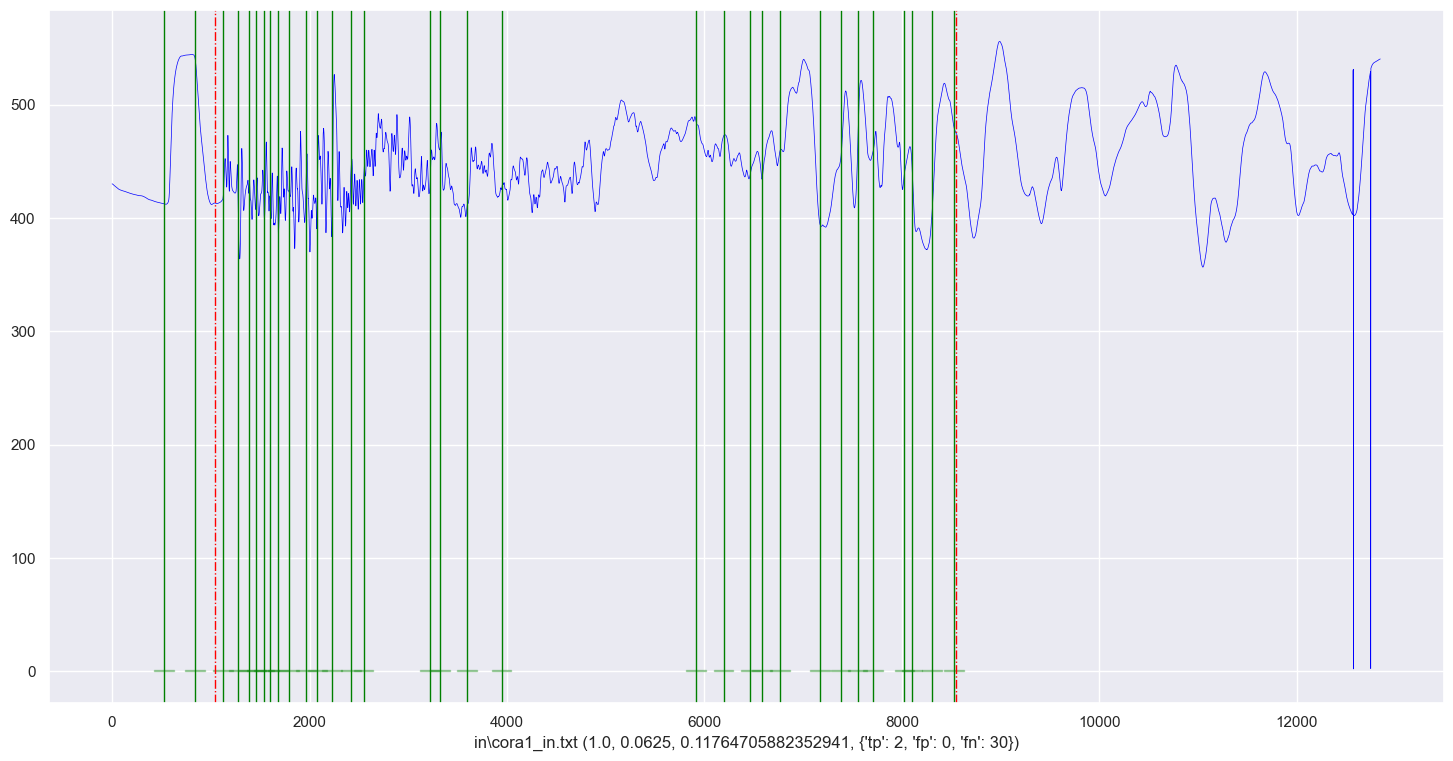

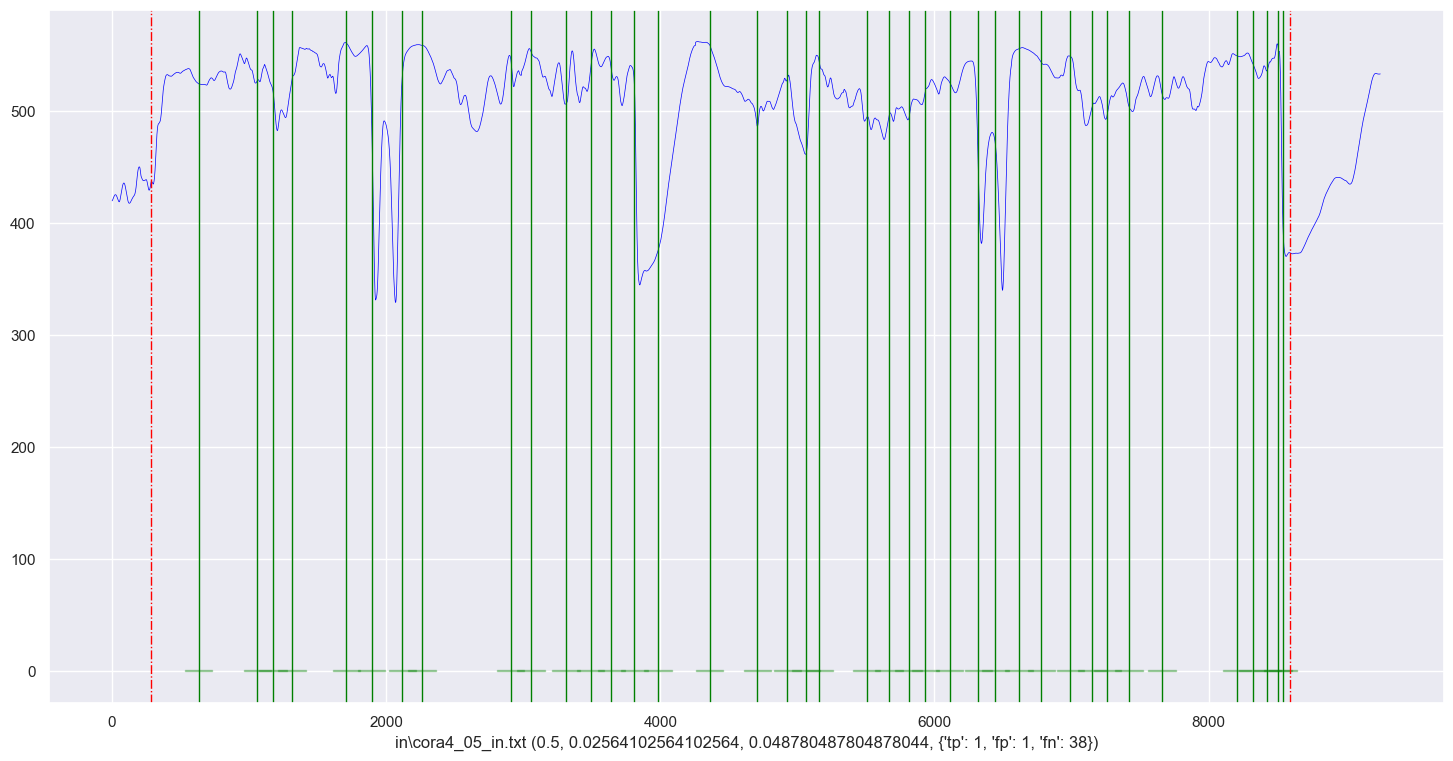

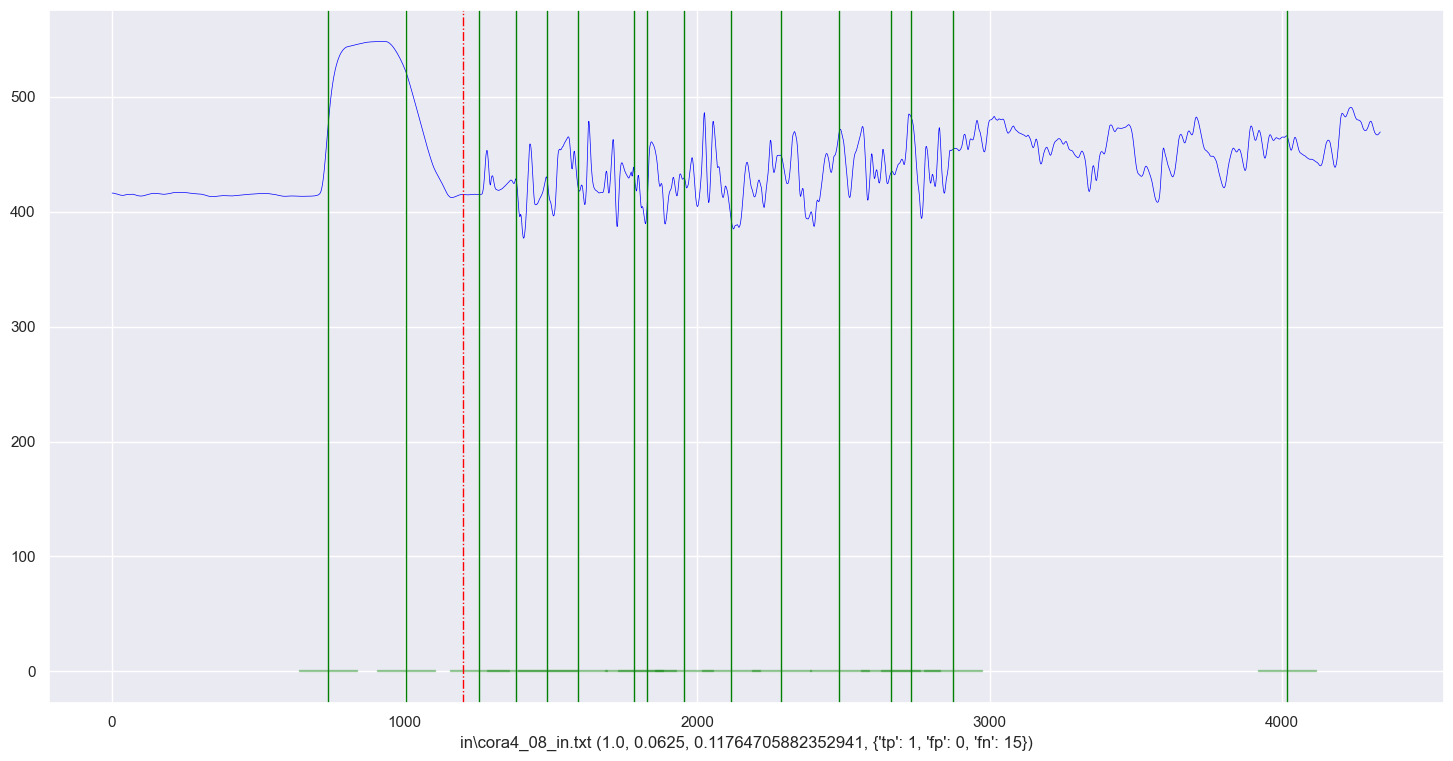

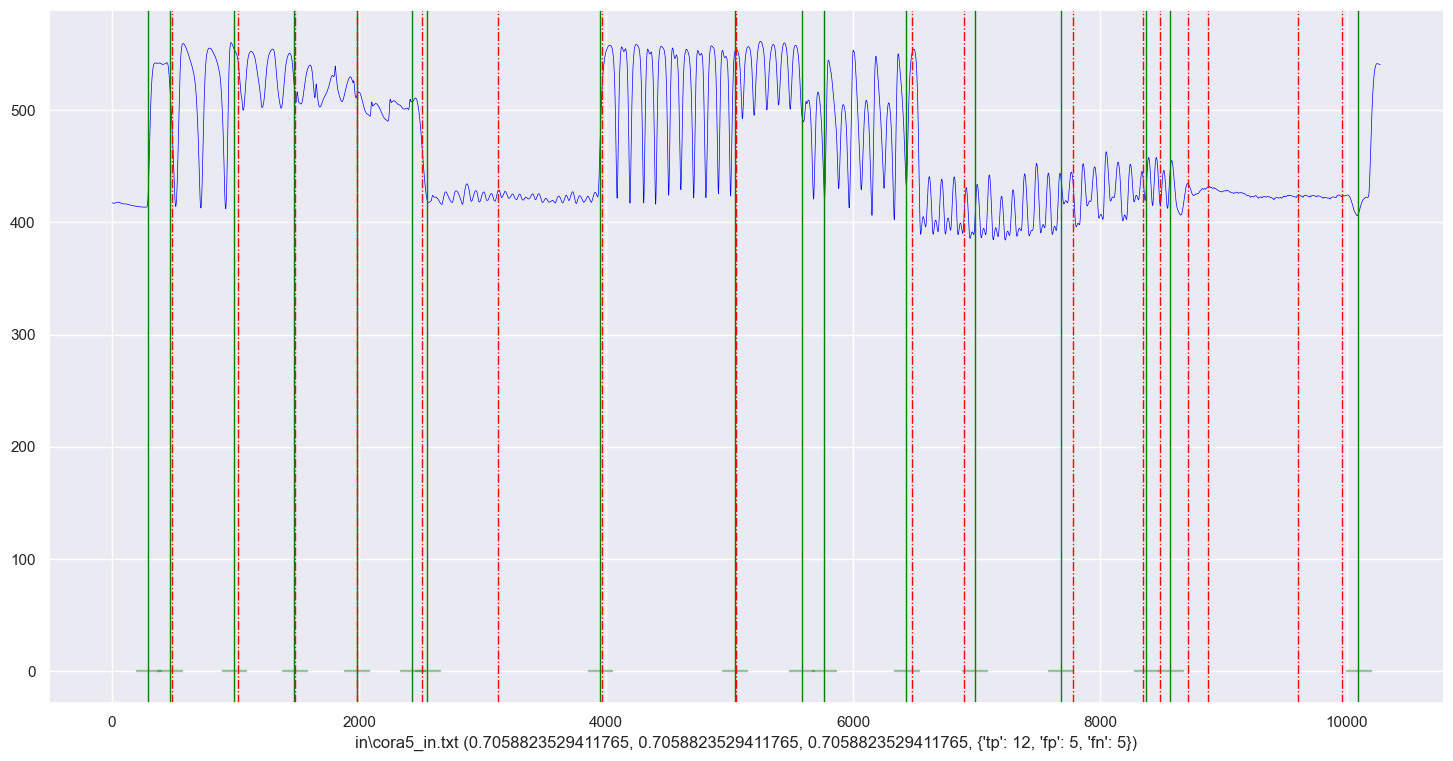

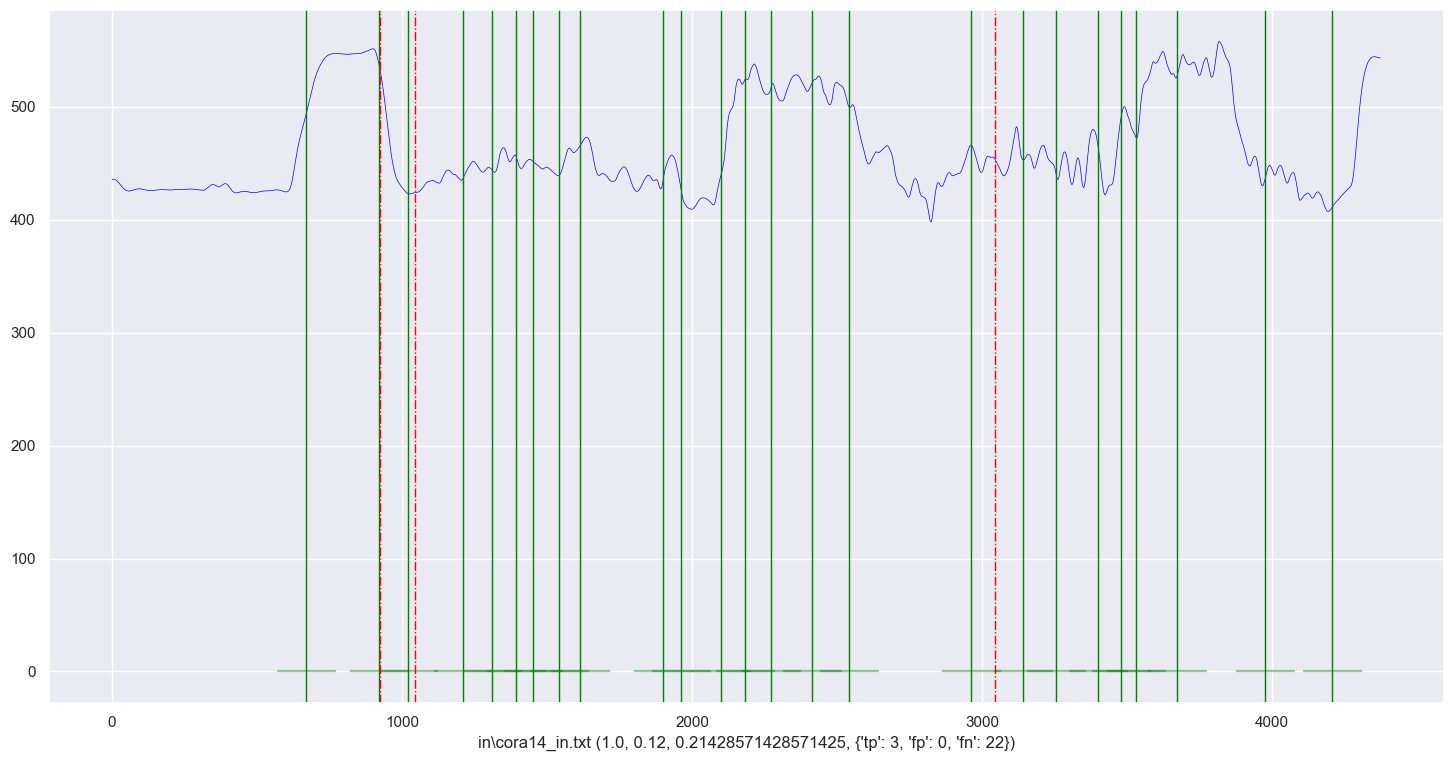

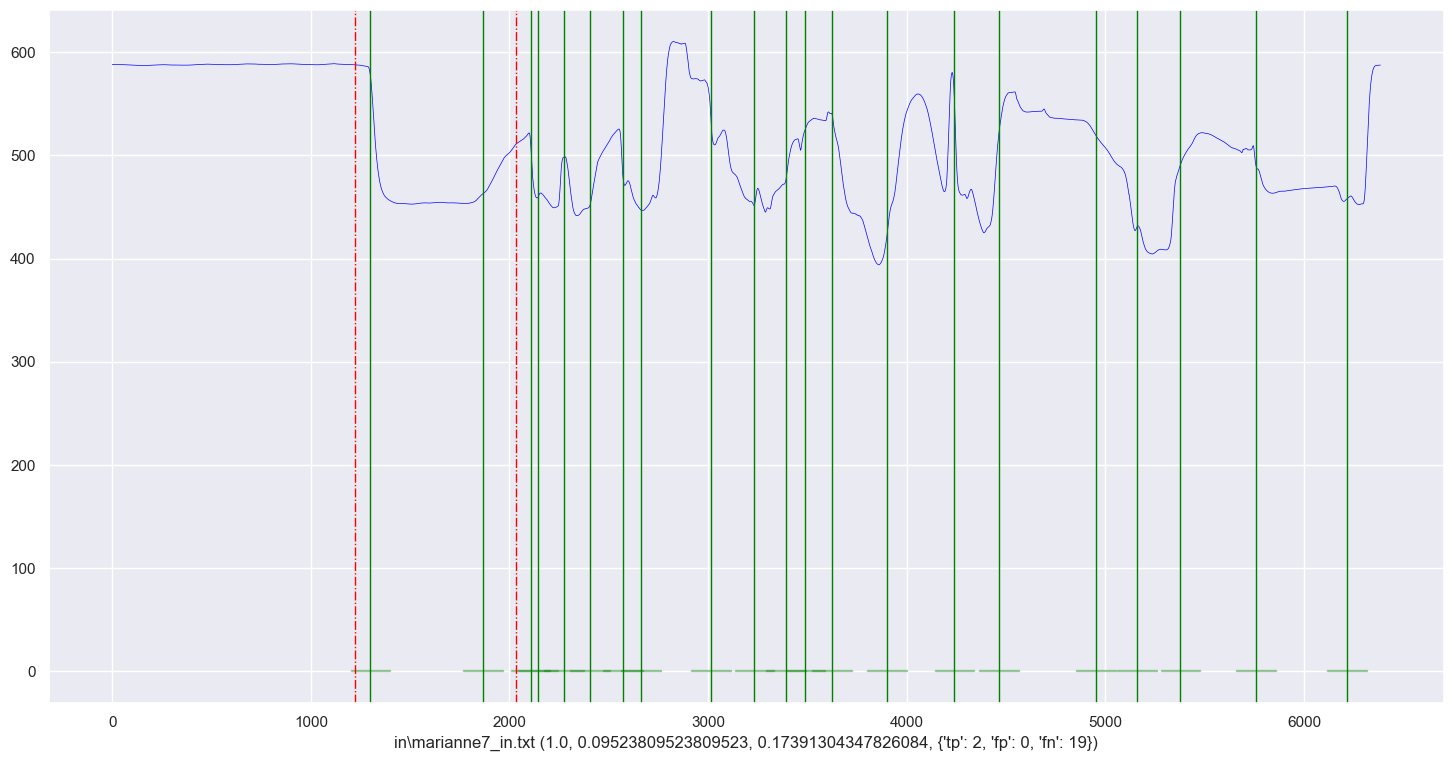

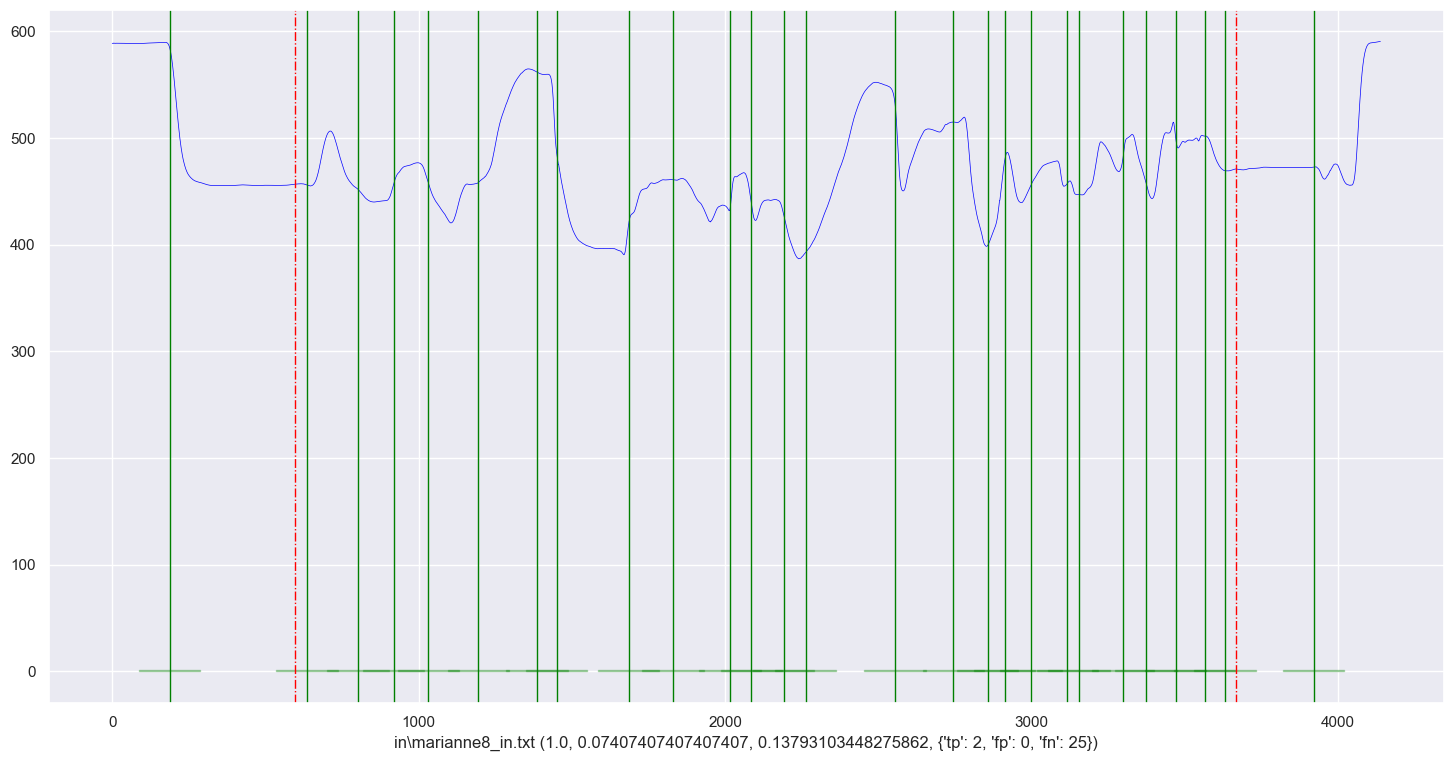

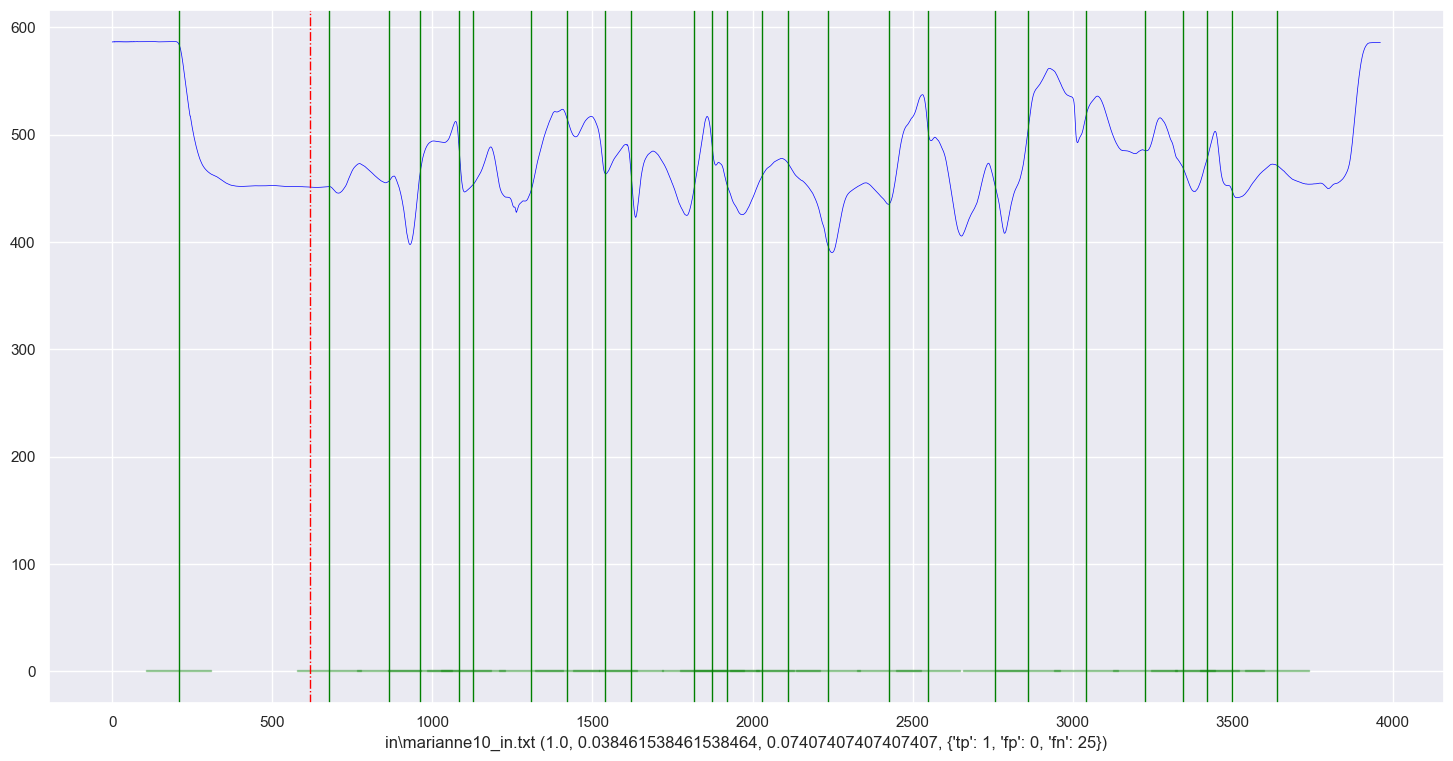

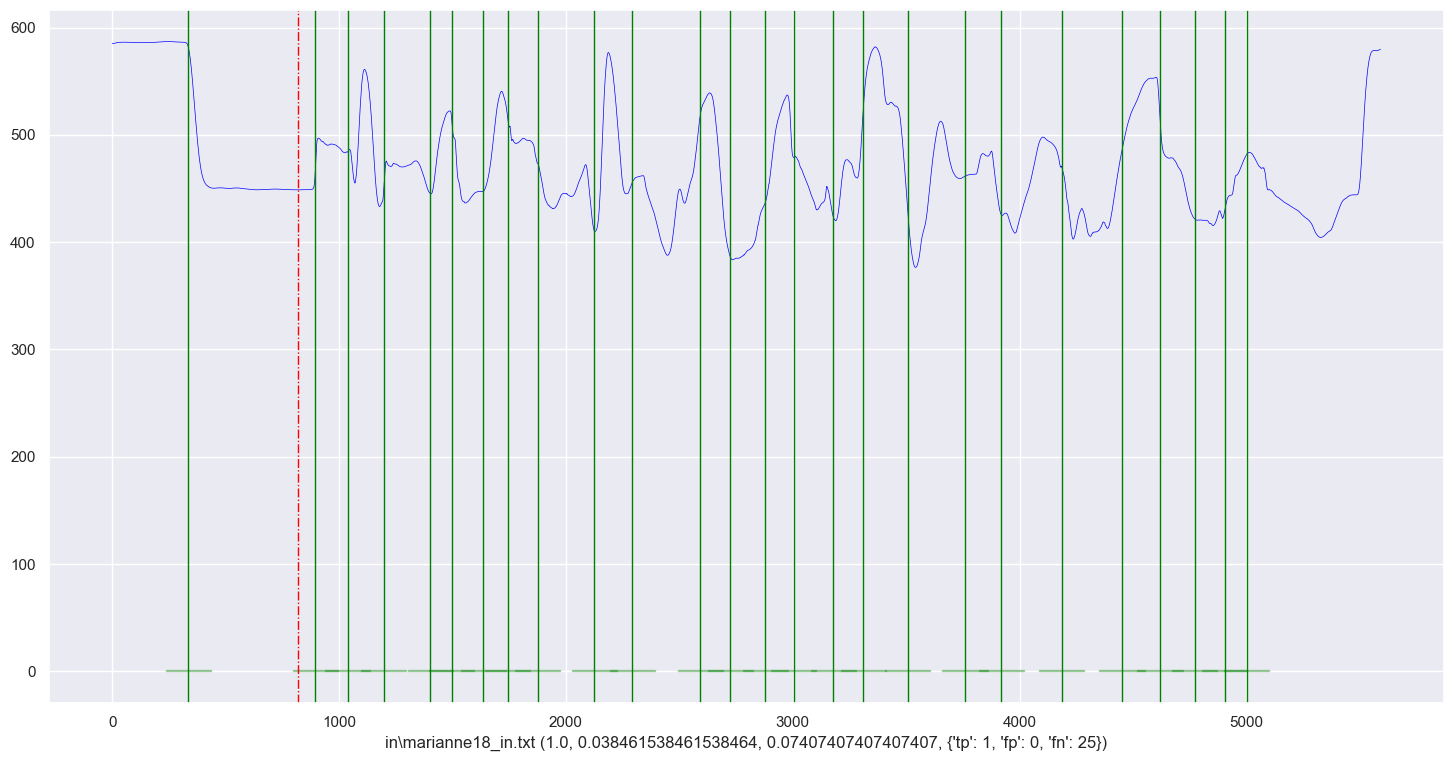

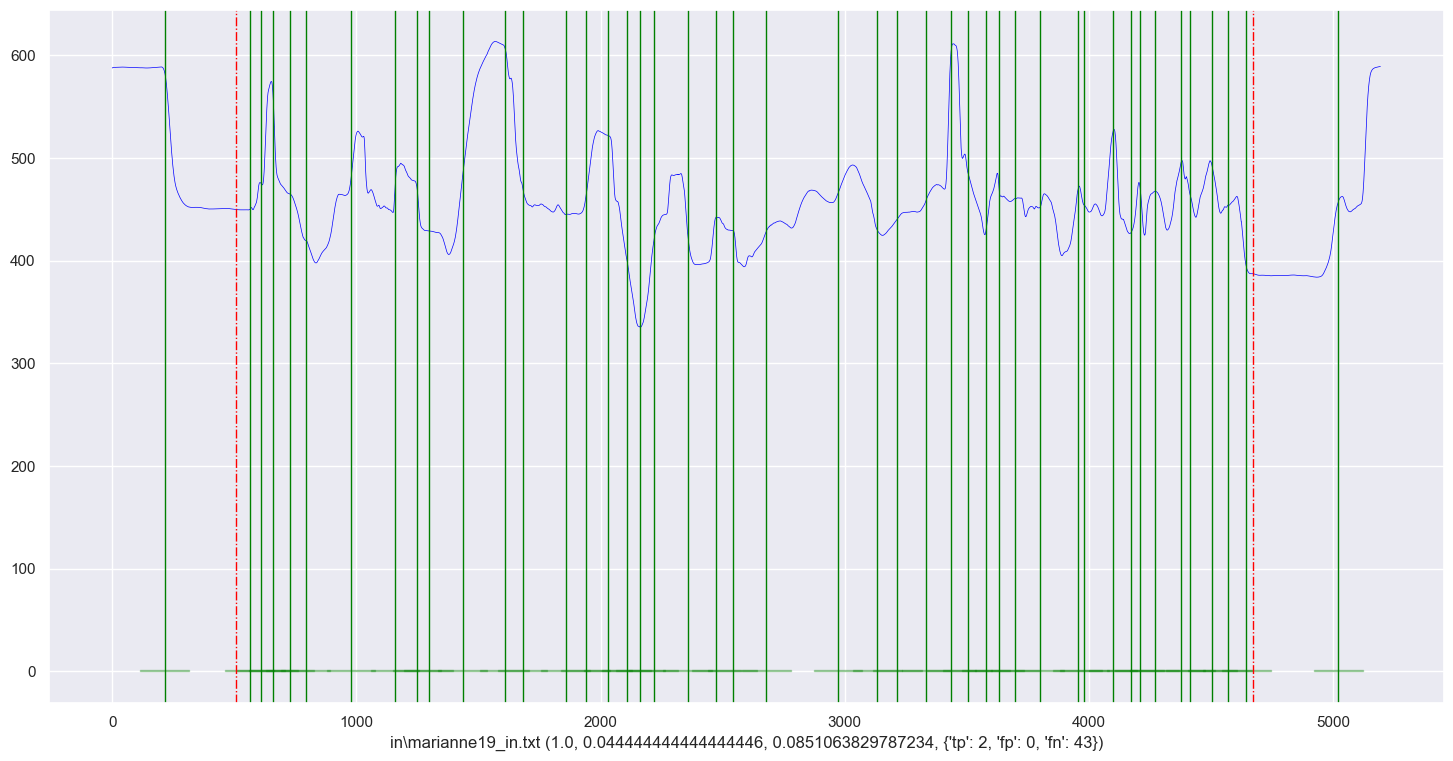

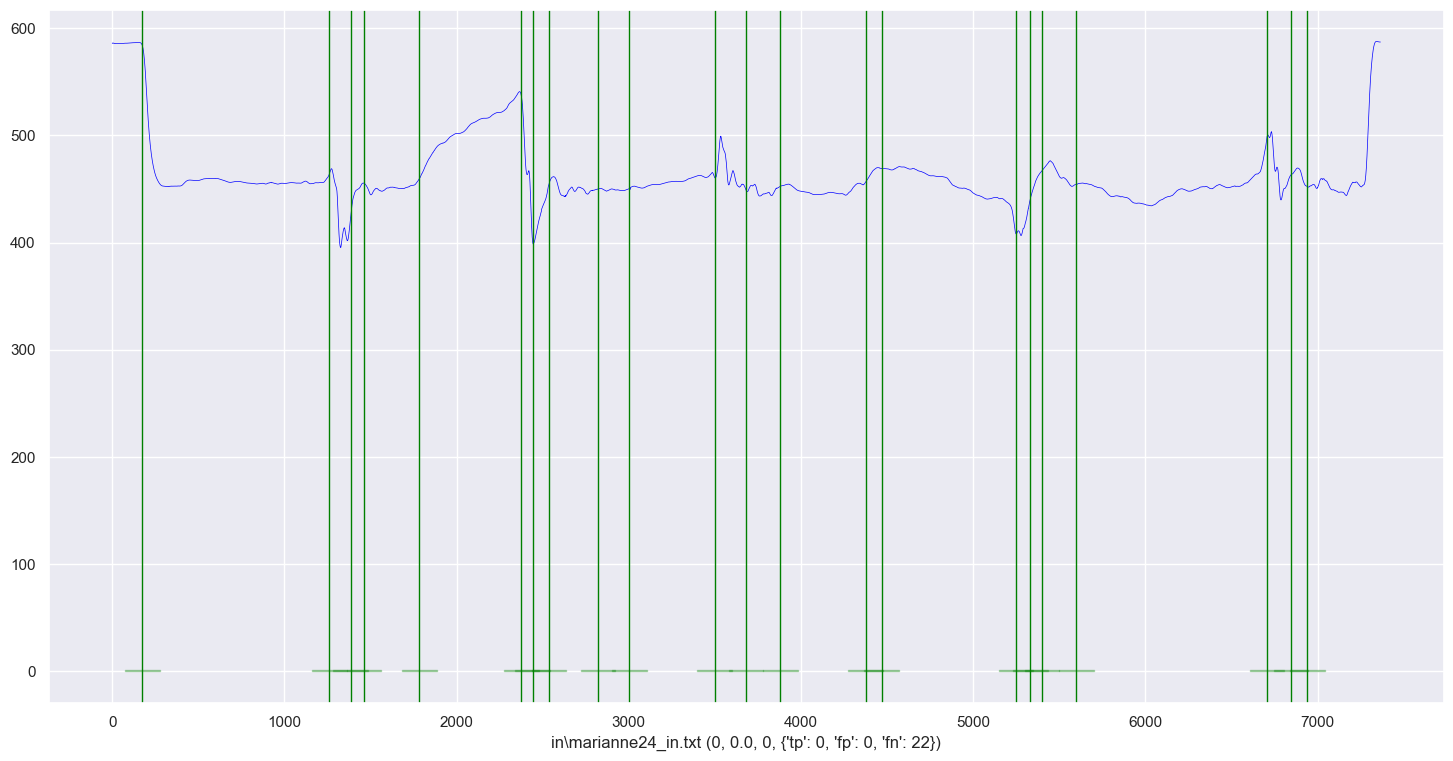

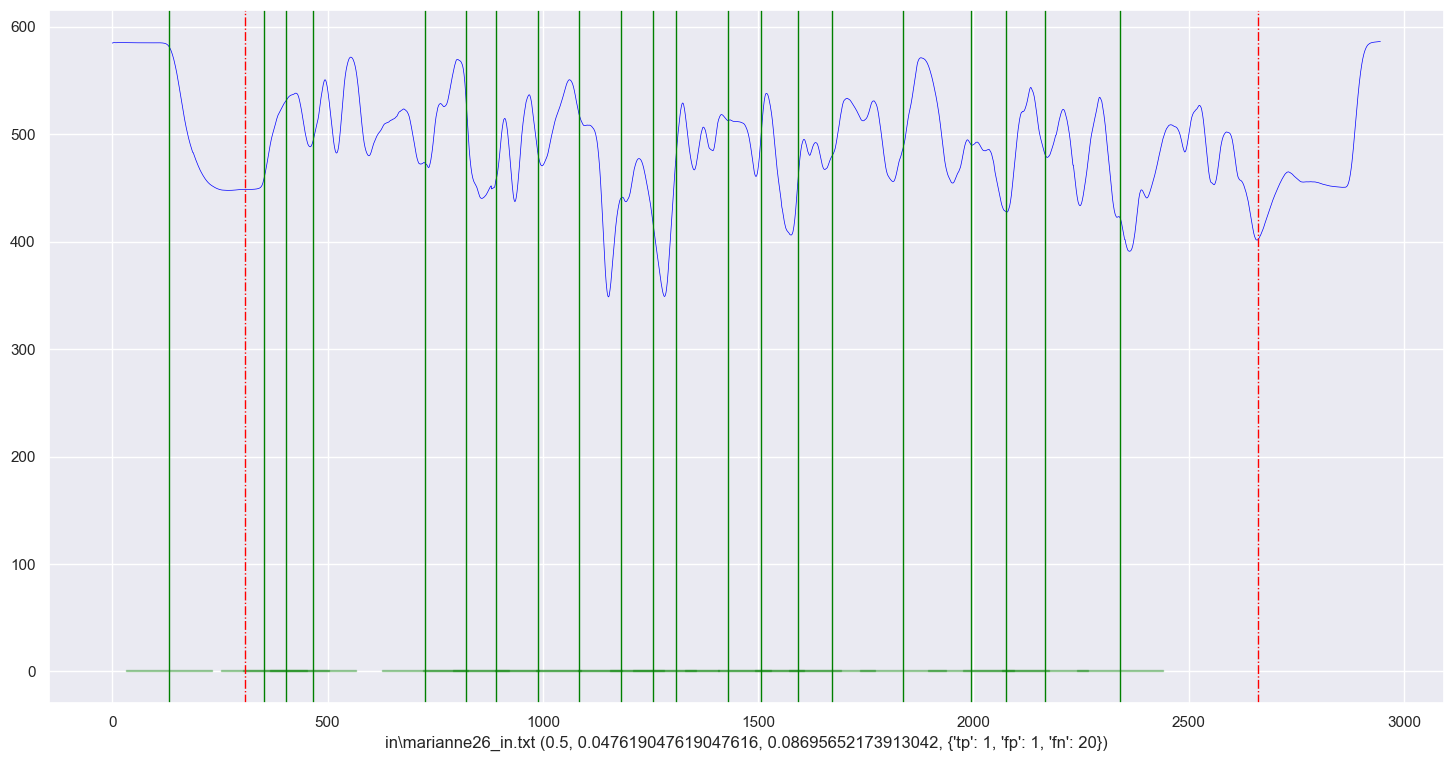

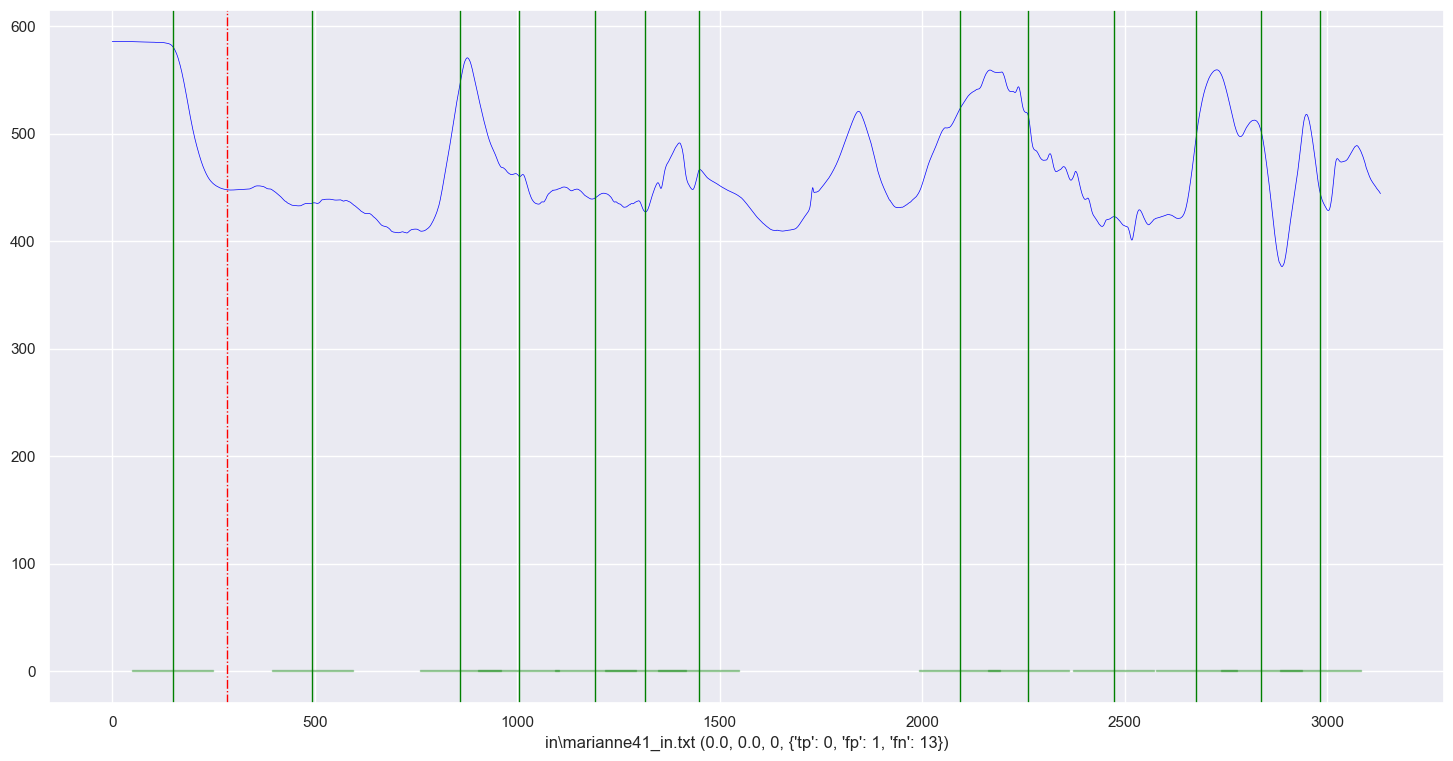

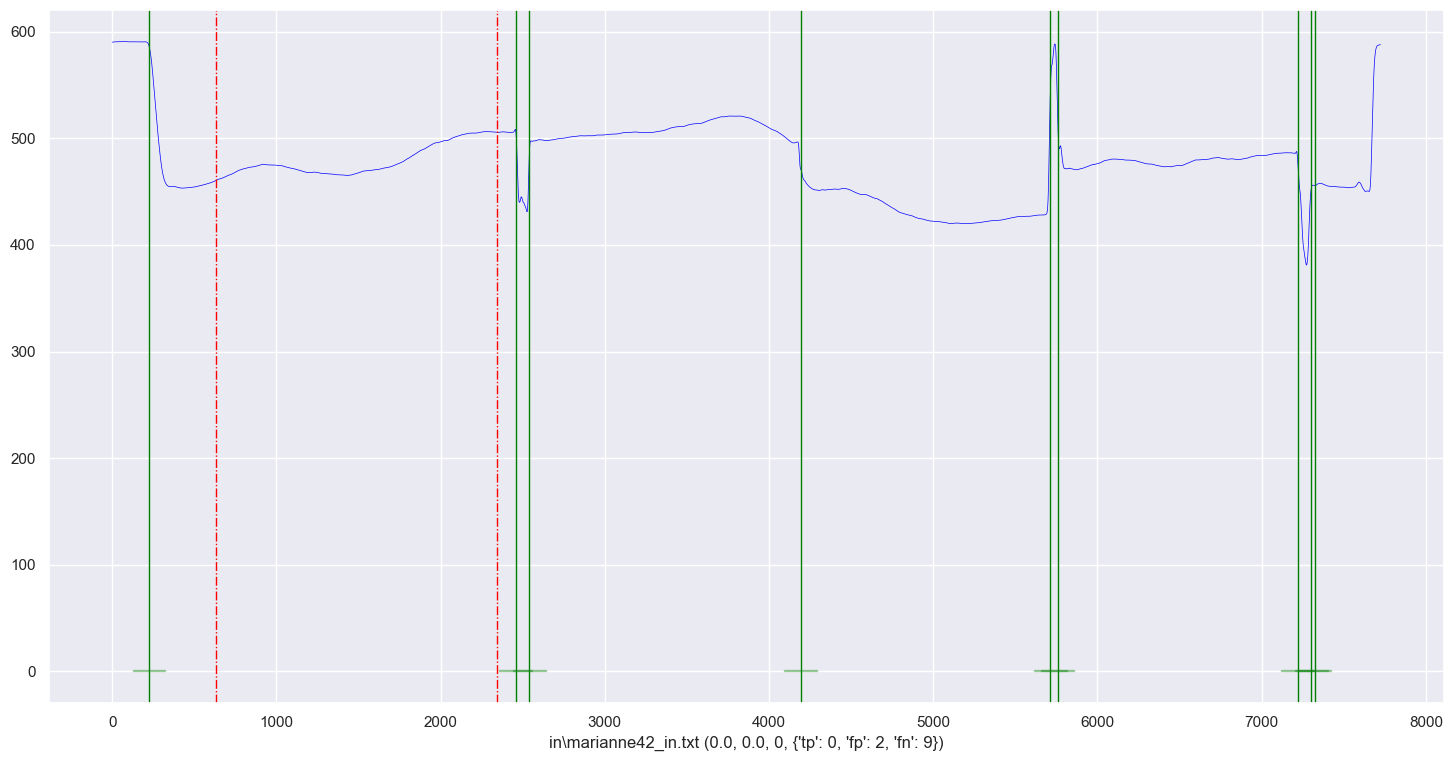

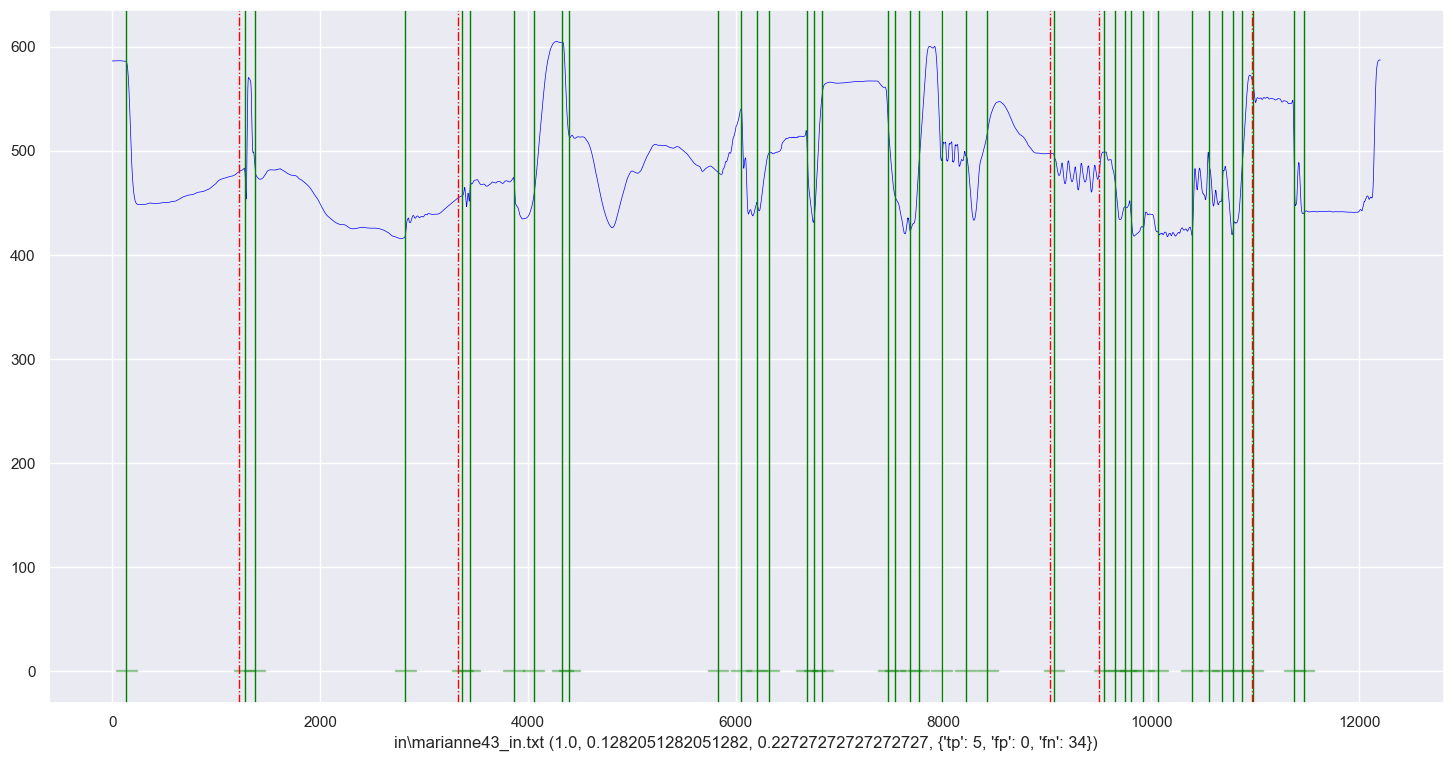

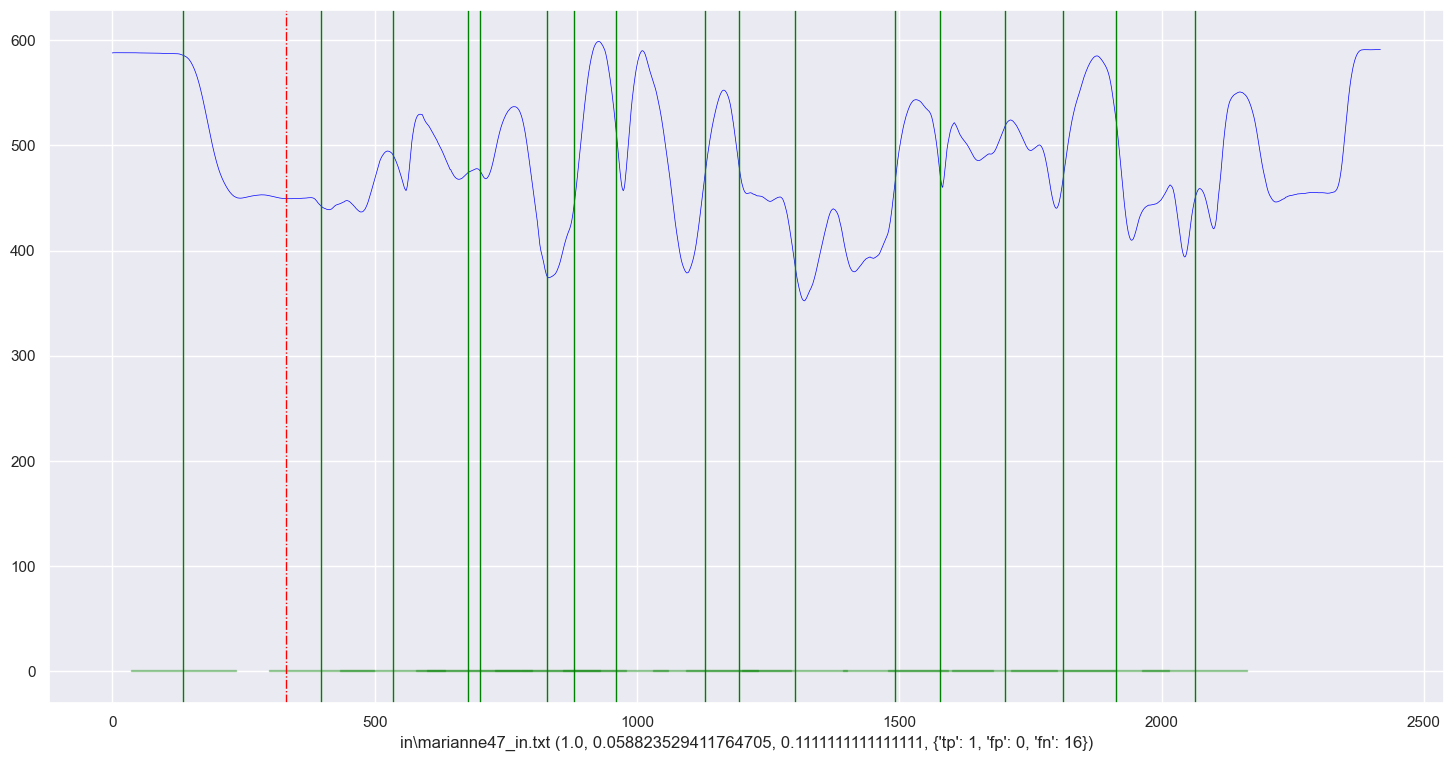

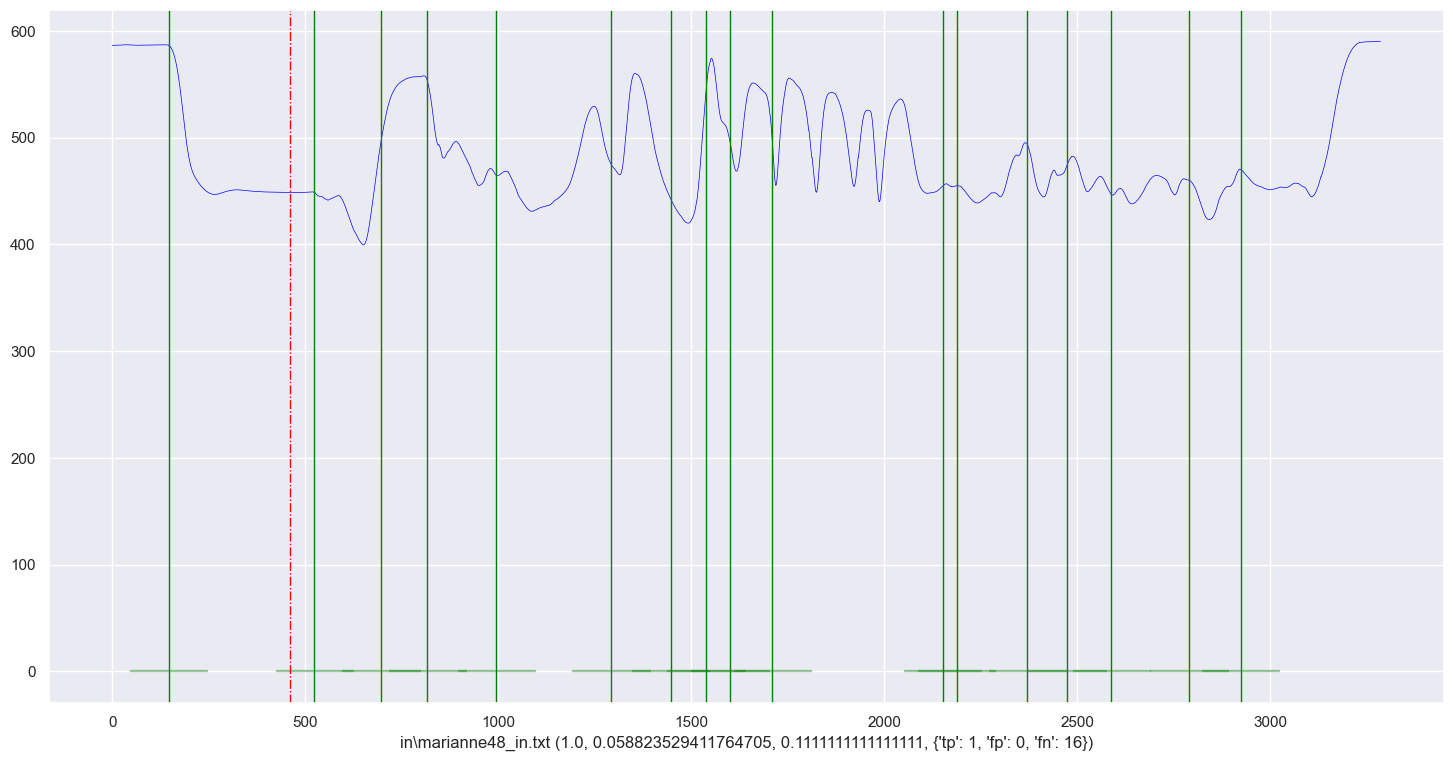

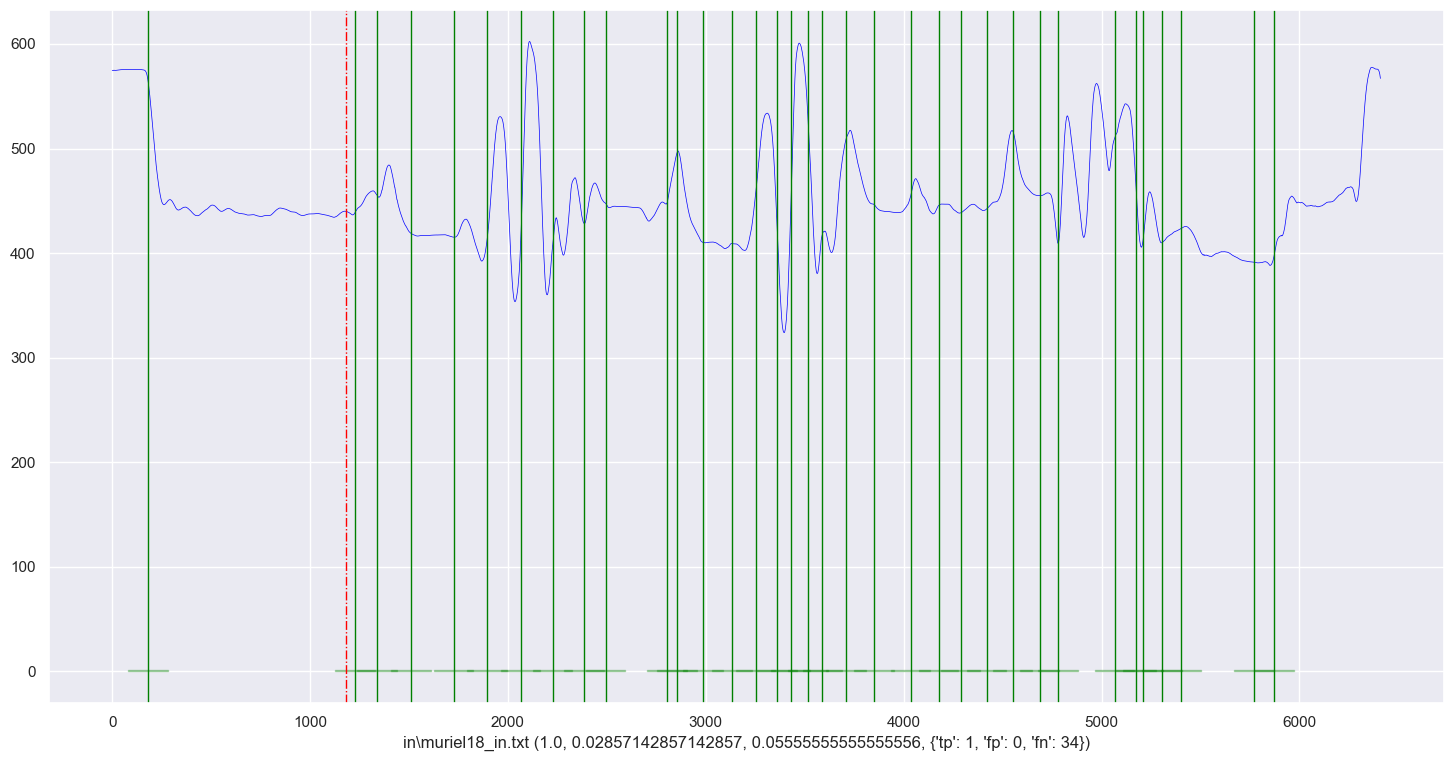

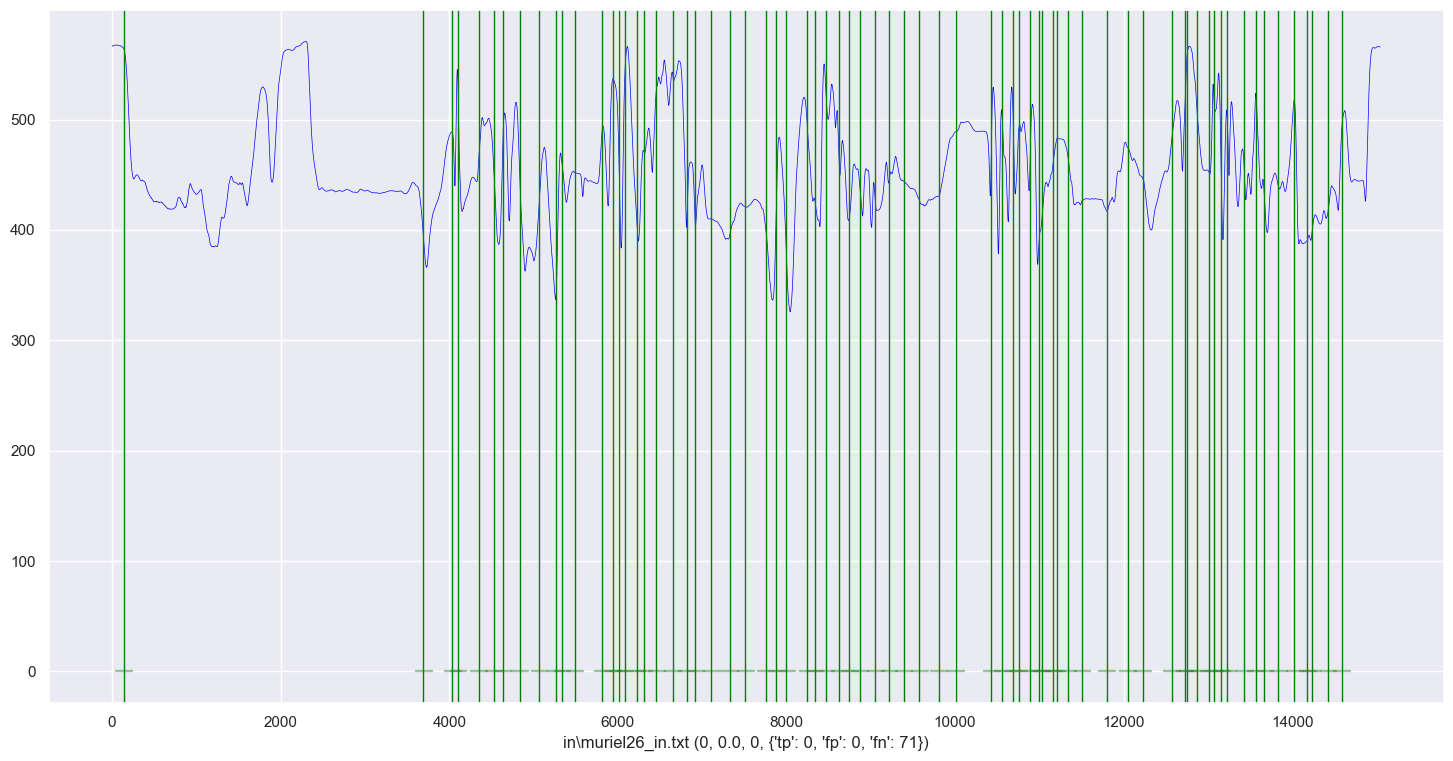

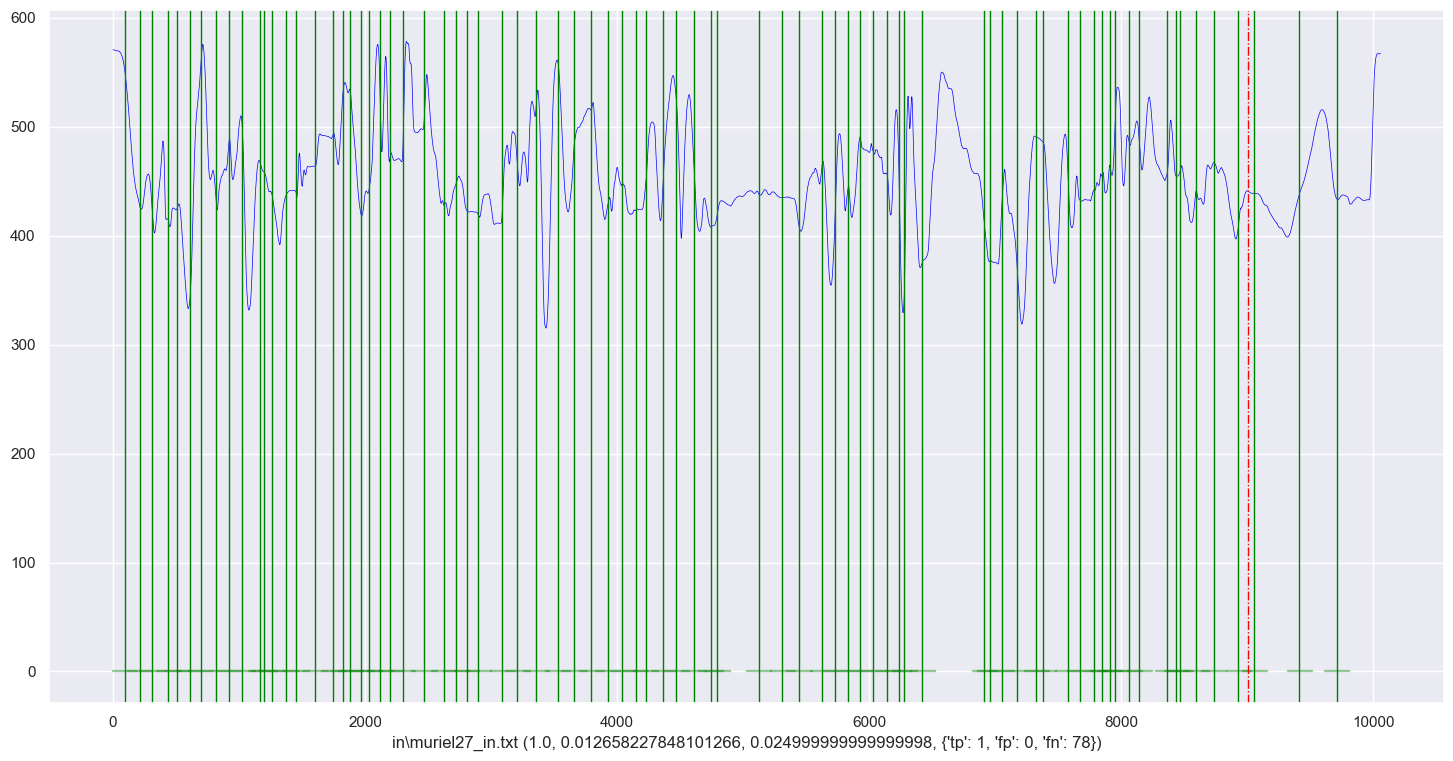

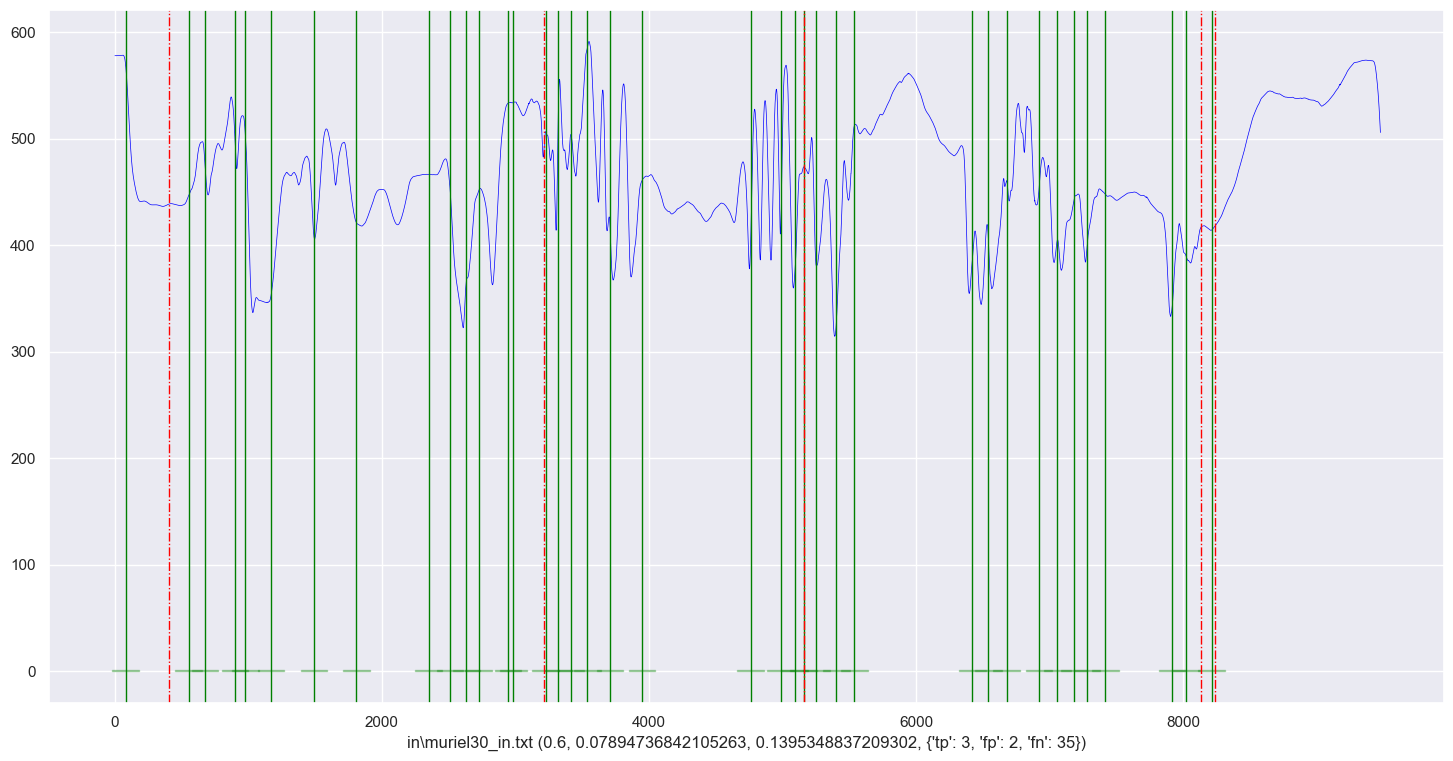

In [88]:
cleaned_array = [s[3:-10] for s in timeseries]
outdf = pd.DataFrame({"name":cleaned_array})
outeval=[]
# CLASP without knowing cp
for i in range(len(timeseries)):
    df=ReadAndPreProcess(timeseries[i])
    gt=LoadingGroundTruth(df,groundtruth[i])
    
    #braccio dx
    # speed components
    feature_selected=[75,76,77]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    speed_braccio_dx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # acceleration components
    feature_selected=[79,80,81]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    acceleration_braccio_dx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # jerk components
    feature_selected=[83,84,85]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    jerk_braccio_dx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # energie/moduli/magnitude/other
    feature_selected=[5,13,23,25,74,78,82]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    braccio_dx = np.array(MajorityVoteCP(cp,100,math.floor(len(feature_selected)/3))).astype(int)
    braccio_dx = np.append(braccio_dx,speed_braccio_dx).flatten()
    braccio_dx = np.append(braccio_dx,acceleration_braccio_dx).flatten()
    braccio_dx = np.append(braccio_dx,jerk_braccio_dx).flatten()
    braccio_dx = np.sort(braccio_dx)
    braccio_dx = np.unique(braccio_dx)
    braccio_dx = MajorityVoteCP(braccio_dx,100,3)
    #Plotclasp(clasp,gt,100,eachcp,feature_selected)
    #PlotResult(df,gt,braccio_dx,timeseries[i],100,clasp)

    #braccio sx
    # speed components
    feature_selected=[87,88,89]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    speed_braccio_sx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # acceleration components
    feature_selected=[91,92,93]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    acceleration_braccio_sx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # jerk components
    feature_selected=[95,96,97]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    jerk_braccio_sx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # energie/moduli/magnitude/other
    feature_selected=[4,12,22,24,86,90,94]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    braccio_sx = np.array(MajorityVoteCP(cp,100,math.floor(len(feature_selected)/3))).astype(int)
    braccio_sx = np.append(braccio_sx,speed_braccio_sx).flatten()
    braccio_sx = np.append(braccio_sx,acceleration_braccio_sx).flatten()
    braccio_sx = np.append(braccio_sx,jerk_braccio_sx).flatten()
    braccio_sx = np.sort(braccio_sx)
    braccio_sx = np.unique(braccio_sx)
    braccio_sx = MajorityVoteCP(braccio_sx,100,3)
    #Plotclasp(clasp,gt,100,eachcp,feature_selected)
    #PlotResult(df,gt,braccio_sx,timeseries[i],100,clasp)

    #gamba dx
    # speed components
    feature_selected=[51,52,53]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    speed_gamba_dx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # acceleration components
    feature_selected=[55,56,57]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    acceleration_gamba_dx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # jerk components
    feature_selected=[59,60,61]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    jerk_gamba_dx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # energie/moduli/magnitude/other
    feature_selected=[7,11,18,21,50,54,58]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    gamba_dx = np.array(MajorityVoteCP(cp,100,math.floor(len(feature_selected)/3))).astype(int)
    gamba_dx = np.append(gamba_dx,speed_gamba_dx).flatten()
    gamba_dx = np.append(gamba_dx,acceleration_gamba_dx).flatten()
    gamba_dx = np.append(gamba_dx,jerk_gamba_dx).flatten()
    gamba_dx = np.sort(gamba_dx)
    gamba_dx = np.unique(gamba_dx)
    gamba_dx = MajorityVoteCP(gamba_dx,100,3)
    #Plotclasp(clasp,gt,100,eachcp,feature_selected)
    #PlotResult(df,gt,gamba_dx,timeseries[i],100,clasp)

    #gamba sx
    # speed components
    feature_selected=[63,64,65]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    speed_gamba_sx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # acceleration components
    feature_selected=[67,68,69]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    acceleration_gamba_sx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # jerk components
    feature_selected=[71,72,73]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    jerk_gamba_sx=np.array(MajorityVoteCP(cp,100,3)).astype(int)
    # energie/moduli/magnitude/other
    feature_selected=[6,10,19,20,62,66,70]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    gamba_sx = np.array(MajorityVoteCP(cp,100,math.floor(len(feature_selected)/3))).astype(int)
    gamba_sx = np.append(gamba_sx,speed_gamba_sx).flatten()
    gamba_sx = np.append(gamba_sx,acceleration_gamba_sx).flatten()
    gamba_sx = np.append(gamba_sx,jerk_gamba_sx).flatten()
    gamba_sx = np.sort(gamba_sx)
    gamba_sx = np.unique(gamba_sx)
    gamba_sx = MajorityVoteCP(gamba_sx,100,3)
    #Plotclasp(clasp,gt,100,eachcp,feature_selected)
    #PlotResult(df,gt,gamba_sx,timeseries[i],100,clasp)


    #density
    #cp,eachcp,clasp=GetClasp3(df,gt,0,3, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    cp=np.array([])
    cp = np.sort(np.append(cp,braccio_dx).flatten())
    cp = np.sort(np.append(cp,braccio_sx).flatten())
    cp = np.sort(np.append(cp,gamba_dx).flatten())
    cp = np.sort(np.append(cp,gamba_sx).flatten())
    cp = np.unique(cp)
    cp=IgnoreZone(i,cp)
    #Plotclasp(clasp,gt,100,eachcp)
    #PlotResult(df,gt,cp,timeseries[i],100,clasp)
    cp=delnear(cp,100)
    #Plotclasp(clasp,gt,100,eachcp)
    PlotResult(df,gt,cp,timeseries[i],100,clasp)

    precision,recall,f1,oth=Evaluate("CLASP",groundtruth[i],gt,"in_old/cora5_input.txt",cp,df,100)
    outeval.append(f1)
outdf["result"] = outeval
outdf.to_excel("outputFile/output_single_OR_AND.xlsx")

df=ReadAndPreProcess("in/cora5_in.txt")
gt=LoadingGroundTruth(df,groundtruth[3])
cp,eachcp,clasp=GetClasp(df,gt,0,[13,3], window_size="suss",distance="euclidean_distance",excl_radius=4, n_jobs=8)
cp=IgnoreZone(3,cp)
Plotclasp(clasp,gt,100,eachcp)
#PlotResult(df,gt,cp,timeseries[i],100,clasp)
cp=delnear(cp,100)
Plotclasp(clasp,gt,100,eachcp)
#PlotResult(df,gt,cp,timeseries[i],100,clasp)
Evaluate("CLASP",groundtruth[3],gt,"in_old/cora5_input.txt",cp,df,100)